Clean data and handle missing values


In [2]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
from src.data.preprocessors import DataPreprocessor

# Veri Setini Yükleme
data = pd.read_csv('merged_dataset_inorder.csv')

# İlk birkaç satırı görüntüle
print("Veri Seti İlk 5 Satır:")
print(data.head())

# Veri hakkında genel bilgi
print("\nVeri Seti Bilgisi:")
print(data.info())

# Eksik değerleri temizleme
print(data.isnull().sum())

print(data.shape)



Veri Seti İlk 5 Satır:
                 Tarih  Blokeslesmemiktari  Saatlikeslesmemiktari  \
0  2019-01-01 00:00:00                44.7                  331.2   
1  2019-01-01 01:00:00                69.9                  527.7   
2  2019-01-01 02:00:00                98.2                  196.7   
3  2019-01-01 03:00:00               101.2                  414.7   
4  2019-01-01 04:00:00                88.7                  497.5   

   Minalisfiyati  Maxalisfiyati  Minsatisfiyati  Maxsatisfiyati  \
0            5.0         101.38           60.00          100.94   
1            5.0         100.98           93.82          296.29   
2           41.0          81.96           40.00           81.96   
3            1.0          45.00            4.00           45.00   
4            1.0          30.00            5.00           30.00   

   Mineslesmefiyati  Maxeslesmefiyati  Talepislemhacmi  ...  Sivas_wspd  \
0             60.00            100.94       1367605.72  ...        15.0   
1        

In [3]:
preprocessor = DataPreprocessor()

# Eksik değerleri temizleme
data = preprocessor.handle_missing_values(data)

# Eksik değerlerin tekrar kontrolü
print("\nEksik Değerlerin Sayısı (Temizleme Sonrası):")
print(data.isnull().sum())

print(data.shape)



Eksik Değerlerin Sayısı (Temizleme Sonrası):
Tarih                    0
Blokeslesmemiktari       0
Saatlikeslesmemiktari    0
Minalisfiyati            0
Maxalisfiyati            0
                        ..
Diyarbakır_wdir          0
Erzurum_temp             0
Erzurum_rhum             0
Erzurum_wspd             0
Erzurum_wdir             0
Length: 63, dtype: int64
(40796, 63)


In [4]:
# İşlenmiş veri çerçevesini CSV dosyası olarak kaydetme
data.to_csv('processed_dataset.csv', index=False)

print("İşlenmiş veri başarıyla 'processed_dataset.csv' dosyasına kaydedildi.")


İşlenmiş veri başarıyla 'processed_dataset.csv' dosyasına kaydedildi.


In [23]:
data1 = pd.read_csv('processed_dataset.csv')

print("Tekrarlanan satır sayısı:", data1.duplicated().sum())
data1 = data.drop_duplicates()


Tekrarlanan satır sayısı: 0


In [26]:
# Gerekli kütüphaneleri yükleme
import pandas as pd
import numpy as np


# Veri setini yükleme
data1 = pd.read_csv('processed_dataset.csv')  

# Sayısal sütunları seçme
numeric_cols = data1.select_dtypes(include=[np.number]).columns


# Aykırı değerlerin oranını hesaplama
def calculate_outliers(df, columns):
    outlier_stats = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3.0 * IQR
        upper_bound = Q3 + 3.0 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_ratio = len(outliers) / len(df) * 100
        outlier_stats[col] = {'Outlier Count': len(outliers), 'Outlier Ratio (%)': outlier_ratio}
    
    return pd.DataFrame(outlier_stats).T



# Aykırı değer oranlarını hesaplama ve gösterme
print("Aykırı Değerlerin İstatistikleri")
outlier_summary = calculate_outliers(data, numeric_cols)
print(outlier_summary)




Aykırı Değerlerin İstatistikleri
                       Outlier Count  Outlier Ratio (%)
Blokeslesmemiktari               0.0           0.000000
Saatlikeslesmemiktari            0.0           0.000000
Minalisfiyati                   78.0           0.191195
Maxalisfiyati                    0.0           0.000000
Minsatisfiyati                 386.0           0.946171
...                              ...                ...
Diyarbakır_wdir                  0.0           0.000000
Erzurum_temp                     0.0           0.000000
Erzurum_rhum                     0.0           0.000000
Erzurum_wspd                     0.0           0.000000
Erzurum_wdir                     0.0           0.000000

[62 rows x 2 columns]


In [25]:
import numpy as np
import pandas as pd

def detect_and_interpolate_outliers(df: pd.DataFrame, method: str = 'iqr', interpolate_method: str = 'linear') -> pd.DataFrame:
 
    numeric_cols = df.select_dtypes(include=[np.number]).columns  # Sadece sayısal sütunlarla çalış
    
    if method == 'iqr':
        for col in numeric_cols:
            # IQR ile alt ve üst sınırları hesapla
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3.0 * IQR
            upper_bound = Q3 + 3.0 * IQR

            # Aykırı değerleri tespit et
            outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
            
            if outliers.any():  # Eğer aykırı değer varsa
                df.loc[outliers, col] = np.nan  # Önce aykırı değerleri NaN yap
                df[col] = df[col].interpolate(method=interpolate_method, limit_direction='both')

    return df

# Veri setini yükleyin
input_file = 'processed_dataset.csv'
data = pd.read_csv(input_file)

# Aykırı değerleri interpolasyon ile doldurma işlemini gerçekleştirin
processed_data = detect_and_interpolate_outliers(data, method='iqr', interpolate_method='linear')

# İşlenmiş veri setini kaydedin
output_file = 'processed_dataset_cleaned.csv'
processed_data.to_csv(output_file, index=False)

print(f"Aykırı değerleri interpolasyon ile doldurulmuş veri seti '{output_file}' olarak kaydedildi.")


Aykırı değerleri interpolasyon ile doldurulmuş veri seti 'processed_dataset_cleaned.csv' olarak kaydedildi.


In [16]:
print(data.isnull().sum())

Tarih                    0
Blokeslesmemiktari       0
Saatlikeslesmemiktari    0
Minalisfiyati            0
Maxalisfiyati            0
                        ..
Diyarbakır_wdir          0
Erzurum_temp             0
Erzurum_rhum             0
Erzurum_wspd             0
Erzurum_wdir             0
Length: 63, dtype: int64


- (5%) Perform comprehensive exploratory data analysis
 - Univariate and Multivariate 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleyin
file_path = 'processed_dataset_cleaned.csv' 
df = pd.read_csv(file_path)

# İlk 5 satırı görüntüleyin
display(df.head())

Tarih  Blokeslesmemiktari  Saatlikeslesmemiktari  \
0  2019-01-01 00:00:00                44.7                  331.2   
1  2019-01-01 01:00:00                69.9                  527.7   
2  2019-01-01 02:00:00                98.2                  196.7   
3  2019-01-01 03:00:00               101.2                  414.7   
4  2019-01-01 04:00:00                88.7                  497.5   

   Minalisfiyati  Maxalisfiyati  Minsatisfiyati  Maxsatisfiyati  \
0            5.0         101.38           60.00          100.94   
1            5.0         100.98           93.82          296.29   
2           41.0          81.96           40.00           81.96   
3            1.0          45.00            4.00           45.00   
4            1.0          30.00            5.00           30.00   

   Mineslesmefiyati  Maxeslesmefiyati  Talepislemhacmi  ...  Sivas_wspd  \
0             60.00            100.94       1367605.72  ...        15.0   
1             93.82            100.98       1321672.20  ...        14.8   
2             41.05             81.96       1107023.11  ...        13.0   
3              4.00             45.00        635394.47  ...        11.2   
4              5.00             30.00        336212.27  ...        16.6   

   Sivas_wdir  Diyarbakır_temp  Diyarbakır_rhum  Diyarbakır_wspd  \
0       110.0             -2.2             94.0              5.4   
1       110.0             -2.0             93.0              7.6   
2       120.0             -3.0             93.0              7.6   
3       110.0             -3.2             93.0              3.6   
4       110.0             -3.0             93.0              0.0   

   Diyarbakır_wdir  Erzurum_temp  Erzurum_rhum  Erzurum_wspd  Erzurum_wdir  
0            340.0          -7.5          95.0           5.4         150.0  
1            260.0          -9.0          92.0           5.4         260.0  
2            260.0         -14.0          92.0           7.6         140.0  
3            300.0         -15.2          95.0           3.6         210.0  
4            255.0         -17.0          84.0           7.6         260.0  

[5 rows x 63 columns]

Blokeslesmemiktari  Saatlikeslesmemiktari  Minalisfiyati  \
count        40796.000000           40796.000000   40796.000000   
mean           527.482333             825.683387     119.426970   
std            337.024663             624.077370     165.143028   
min              0.000000               0.000000       0.000000   
25%            261.000000             360.000000       1.000000   
50%            451.100000             649.750000      40.120000   
75%            733.825000            1126.925000     200.000000   
max           2152.000000            3427.700000     825.000000   

       Maxalisfiyati  Minsatisfiyati  Maxsatisfiyati  Mineslesmefiyati  \
count   40796.000000    40796.000000    40796.000000      40796.000000   
mean     1265.374721      360.840163     1563.860569        410.956389   
std      1330.383338      356.363278     1512.503871        394.997360   
min         2.790000        0.000000        9.300000          0.000000   
25%       325.610000      104.995000      390.000000        156.560000   
50%       419.765000      266.265000      600.000000        284.000000   
75%      2240.000000      464.470000     2678.000000        535.570000   
max      4944.000000     1666.900000     4944.000000       1752.210000   

       Maxeslesmefiyati  Talepislemhacmi  Arzislemhacmi  ...    Sivas_wspd  \
count      40796.000000     4.079600e+04   4.079600e+04  ...  40796.000000   
mean        1245.495463     2.270784e+07   2.272147e+07  ...     11.052052   
std         1315.515941     2.551218e+07   2.527866e+07  ...      8.578102   
min            2.790000     0.000000e+00   0.000000e+00  ...      0.000000   
25%          323.010000     5.656933e+06   5.665623e+06  ...      3.600000   
50%          398.980000     8.299676e+06   8.324121e+06  ...      9.400000   
75%         2182.160000     3.470637e+07   3.527225e+07  ...     14.800000   
max         4944.000000     1.201589e+08   1.172921e+08  ...     48.200000   

         Sivas_wdir  Diyarbakır_temp  Diyarbakır_rhum  Diyarbakır_wspd  \
count  40796.000000     40796.000000     40796.000000     40796.000000   
mean     196.643409        17.125762        52.193757         9.583907   
std      112.861538        11.476463        27.863351         6.769255   
min        0.000000       -13.000000         4.000000         0.000000   
25%      110.000000         7.900000        27.000000         5.400000   
50%      180.000000        16.000000        47.000000         7.600000   
75%      310.000000        26.700000        77.000000        13.000000   
max      360.000000        44.100000       100.000000        35.300000   

       Diyarbakır_wdir  Erzurum_temp  Erzurum_rhum  Erzurum_wspd  Erzurum_wdir  
count     40796.000000  40796.000000  40796.000000  40796.000000  40796.000000  
mean        197.616335      6.876726     65.316771     10.739356    172.022294  
std         110.979308     11.725311     24.005892      8.418094    104.260135  
min           0.000000    -32.000000      4.000000      0.000000      0.000000  
25%         100.000000     -1.000000     47.000000      3.600000     80.000000  
50%         220.000000      7.000000     69.000000      9.400000    190.000000  
75%         300.000000     16.000000     86.000000     16.600000    260.000000  
max         360.000000     35.000000    112.000000     55.400000    360.000000  

[8 rows x 62 columns]

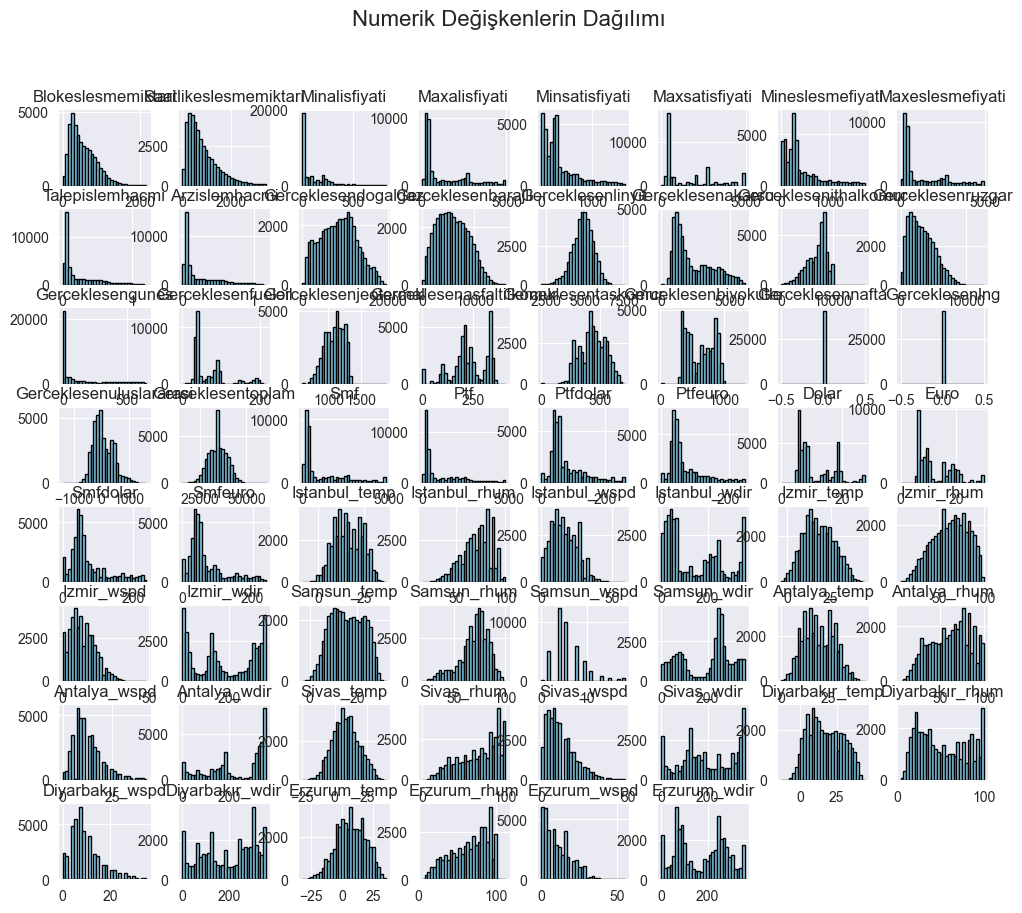

In [5]:
# Sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Temel istatistikleri görüntüle
display(df[numeric_columns].describe())

# Histogramlar
df[numeric_columns].hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Numerik Değişkenlerin Dağılımı', fontsize=16)
plt.show()


Eksik Değerlerin Sayısı:
 Series([], dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

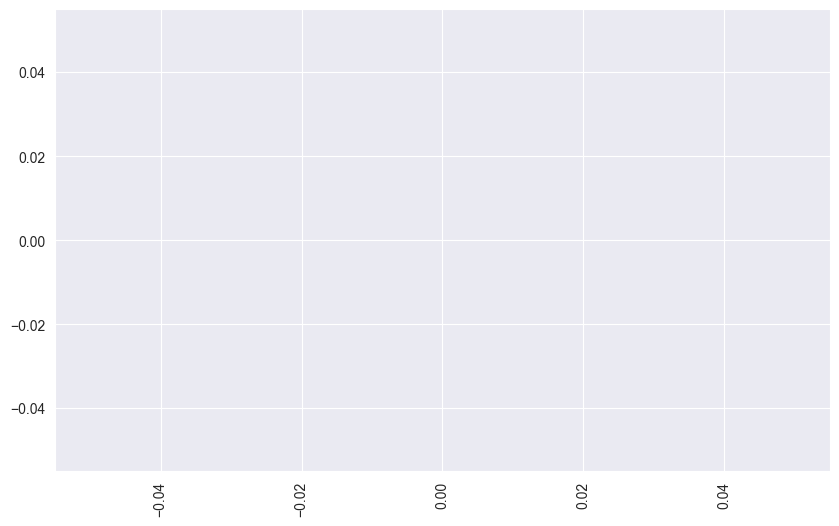

In [6]:
# Eksik değerlerin toplamı
missing_values = df.isnull().sum()
print("Eksik Değerlerin Sayısı:\n", missing_values[missing_values > 0])

# Eksik veri yüzdesini görselleştir
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage[missing_values_percentage > 0].plot(
    kind='bar', figsize=(10, 6), color='coral', edgecolor='black')
plt.title('Eksik Değerlerin Yüzdesi')
plt.ylabel('%')
plt.show()


In [7]:
# Aykırı değerlerin metinsel olarak analizi
outlier_summary = []

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.00 * IQR
    upper_bound = Q3 + 3.0 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_summary.append({
        "Değişken": col,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Alt Sınır": lower_bound,
        "Üst Sınır": upper_bound,
        "Aykırı Değer Sayısı": outlier_count
    })

# Aykırı değer özetini tablo olarak yazdırma
import pandas as pd

outlier_summary_df = pd.DataFrame(outlier_summary)
print(outlier_summary_df)


                 Değişken       Q1        Q3       IQR  Alt Sınır  Üst Sınır  \
0      Blokeslesmemiktari  261.000   733.825   472.825  -1157.475   2152.300   
1   Saatlikeslesmemiktari  360.000  1126.925   766.925  -1940.775   3427.700   
2           Minalisfiyati    1.000   200.000   199.000   -596.000    797.000   
3           Maxalisfiyati  325.610  2240.000  1914.390  -5417.560   7983.170   
4          Minsatisfiyati  104.995   464.470   359.475   -973.430   1542.895   
..                    ...      ...       ...       ...        ...        ...   
57        Diyarbakır_wdir  100.000   300.000   200.000   -500.000    900.000   
58           Erzurum_temp   -1.000    16.000    17.000    -52.000     67.000   
59           Erzurum_rhum   47.000    86.000    39.000    -70.000    203.000   
60           Erzurum_wspd    3.600    16.600    13.000    -35.400     55.600   
61           Erzurum_wdir   80.000   260.000   180.000   -460.000    800.000   

    Aykırı Değer Sayısı  
0            

Multivariate Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


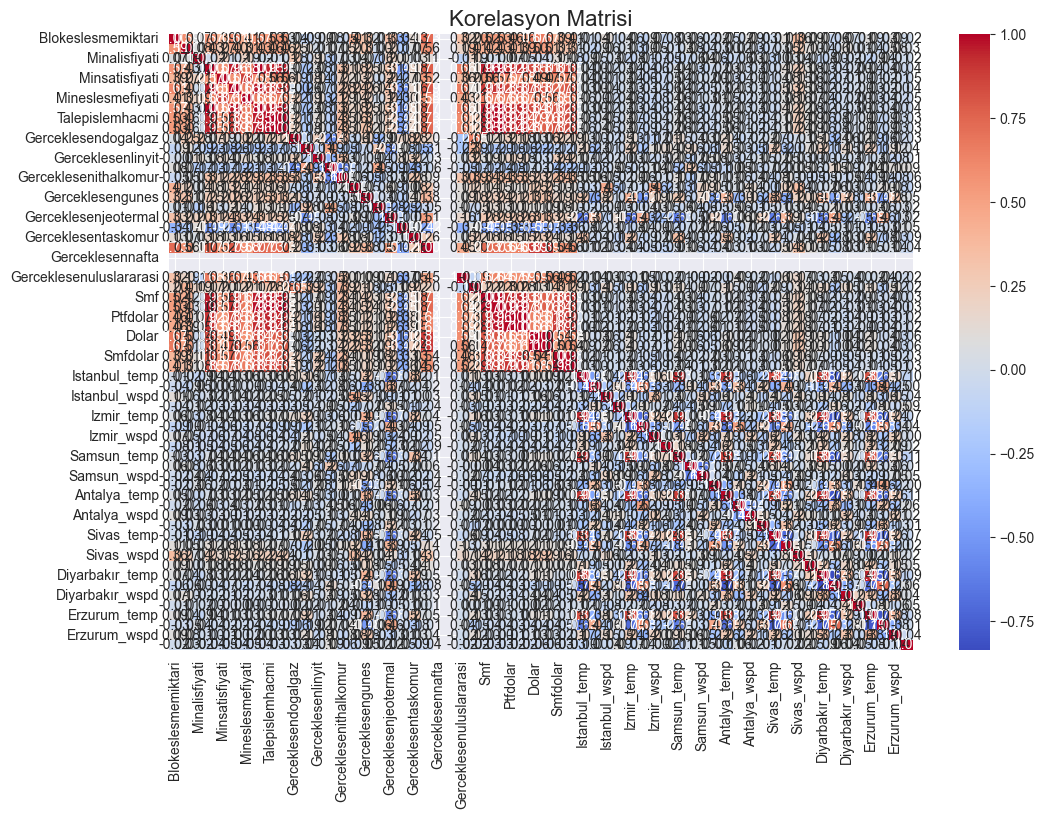

In [9]:
# Korelasyon Matrisi
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Korelasyon Matrisi", fontsize=16)
plt.show()


In [10]:
# Korelasyon değerlerini metinsel olarak yazdırma
correlation_summary = correlation_matrix.unstack().sort_values(ascending=False).reset_index()
correlation_summary.columns = ["Değişken 1", "Değişken 2", "Korelasyon"]
correlation_summary = correlation_summary[correlation_summary["Değişken 1"] != correlation_summary["Değişken 2"]]
print("En Yüksek Korelasyonlar:")
print(correlation_summary.head(60))


En Yüksek Korelasyonlar:
           Değişken 1        Değişken 2  Korelasyon
60    Talepislemhacmi     Arzislemhacmi    0.998648
61      Arzislemhacmi   Talepislemhacmi    0.998648
62      Maxalisfiyati  Maxeslesmefiyati    0.996619
63   Maxeslesmefiyati     Maxalisfiyati    0.996619
64           Ptfdolar           Ptfeuro    0.995899
65            Ptfeuro          Ptfdolar    0.995899
66              Dolar              Euro    0.995494
67               Euro             Dolar    0.995494
68   Maxeslesmefiyati               Ptf    0.980003
69                Ptf  Maxeslesmefiyati    0.980003
70                Ptf   Talepislemhacmi    0.979840
71    Talepislemhacmi               Ptf    0.979840
72      Arzislemhacmi               Ptf    0.979178
73                Ptf     Arzislemhacmi    0.979178
74           Smfdolar           Smfeuro    0.976595
75            Smfeuro          Smfdolar    0.976595
76      Maxalisfiyati               Ptf    0.975726
77                Ptf     Maxalisfiyati

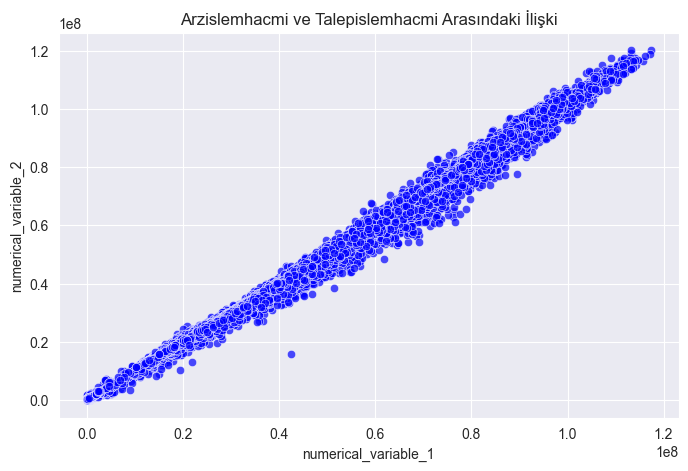

In [11]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Arzislemhacmi", y="Talepislemhacmi", alpha=0.7, color="blue")
plt.title("Arzislemhacmi ve Talepislemhacmi Arasındaki İlişki")
plt.xlabel("numerical_variable_1")
plt.ylabel("numerical_variable_2")
plt.show()


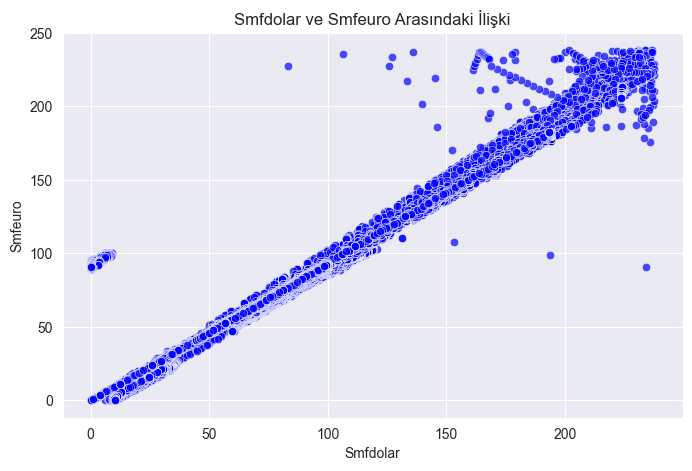

In [12]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Smfdolar", y="Smfeuro", alpha=0.7, color="blue")
plt.title("Smfdolar ve Smfeuro Arasındaki İlişki")
plt.xlabel("Smfdolar")
plt.ylabel("Smfeuro")
plt.show()


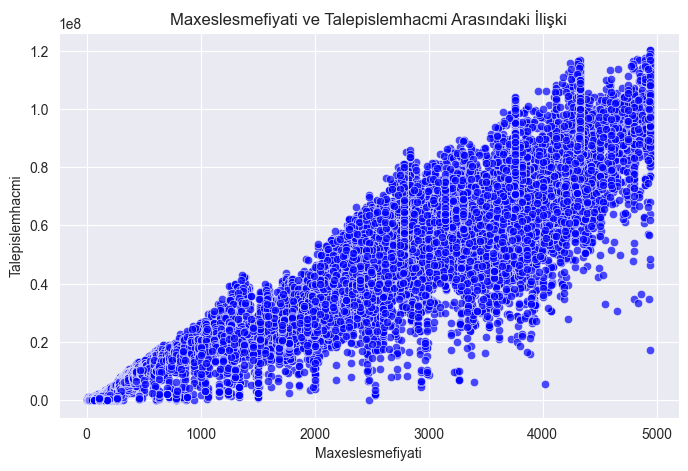

In [13]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Maxeslesmefiyati", y="Talepislemhacmi", alpha=0.7, color="blue")
plt.title("Maxeslesmefiyati ve Talepislemhacmi Arasındaki İlişki")
plt.xlabel("Maxeslesmefiyati")
plt.ylabel("Talepislemhacmi")
plt.show()


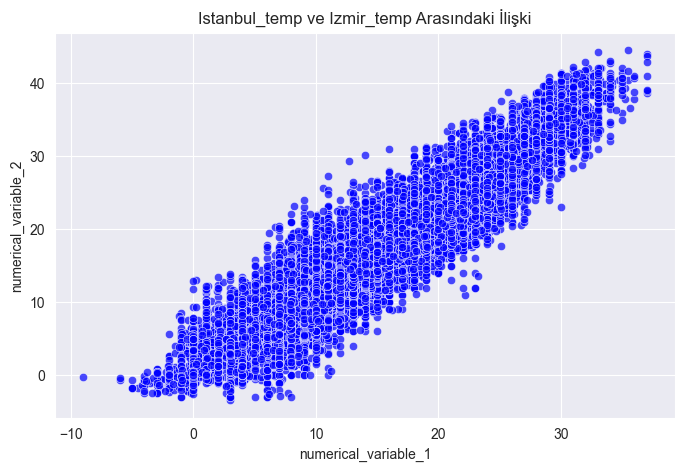

In [14]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Istanbul_temp", y="Izmir_temp", alpha=0.7, color="blue")
plt.title("Istanbul_temp ve Izmir_temp Arasındaki İlişki")
plt.xlabel("numerical_variable_1")
plt.ylabel("numerical_variable_2")
plt.show()


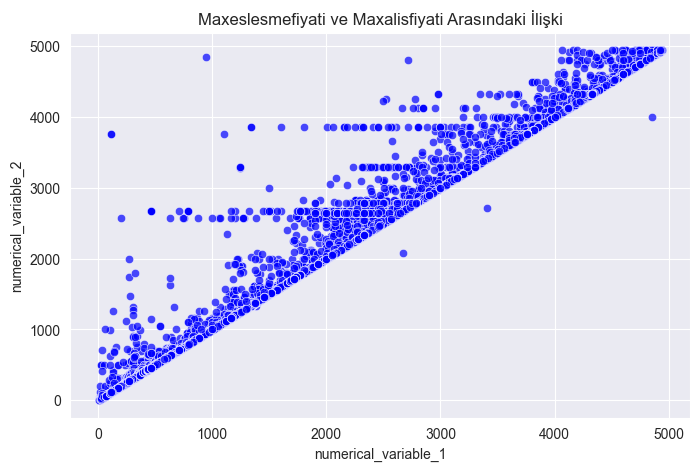

In [15]:
# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Maxeslesmefiyati", y="Maxalisfiyati", alpha=0.7, color="blue")
plt.title("Maxeslesmefiyati ve Maxalisfiyati Arasındaki İlişki")
plt.xlabel("numerical_variable_1")
plt.ylabel("numerical_variable_2")
plt.show()


Feature Engineering

In [1]:
import pandas as pd
from src.features.builders import apply_feature_engineering

# Veri setini yükle
file_path = "processed_dataset_cleaned.csv"
df = pd.read_csv(file_path)

# Feature engineering uygula
df = apply_feature_engineering(df)

# Sonuçları kaydet
df.to_csv("processed_dataset_with_features.csv", index=False)
print("Feature engineering tamamlandı ve veri kaydedildi.")


Feature engineering tamamlandı ve veri kaydedildi.


In [3]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
from src.data.preprocessors import DataPreprocessor

# Veri Setini Yükleme
data = pd.read_csv('processed_dataset_with_features.csv')

preprocessor = DataPreprocessor()

# Eksik değerleri temizleme
data = preprocessor.handle_missing_values(data)

# Eksik değerlerin tekrar kontrolü
print("\nEksik Değerlerin Sayısı (Temizleme Sonrası):")
print(data.isnull().sum())

print(data.shape)

data.to_csv('processed_dataset_with_features.csv', index=False)
print("İşlenmiş veri başarıyla 'processed_dataset_with_features.csv' dosyasına kaydedildi.")



Eksik Değerlerin Sayısı (Temizleme Sonrası):
Tarih                           0
Blokeslesmemiktari              0
Saatlikeslesmemiktari           0
Minalisfiyati                   0
Maxalisfiyati                   0
                               ..
Ptfdolar_rolling_sum            0
Ptfdolar_rolling_std            0
Talepislemhacmi_rolling_mean    0
Talepislemhacmi_rolling_sum     0
Talepislemhacmi_rolling_std     0
Length: 94, dtype: int64
(40796, 94)
İşlenmiş veri başarıyla 'processed_dataset_with_features.csv' dosyasına kaydedildi.


In [5]:
print(f"Veri setinin toplam satır sayısı: {data.shape[0]}")

Veri setinin toplam satır sayısı: 40796


 feature selection techniques:

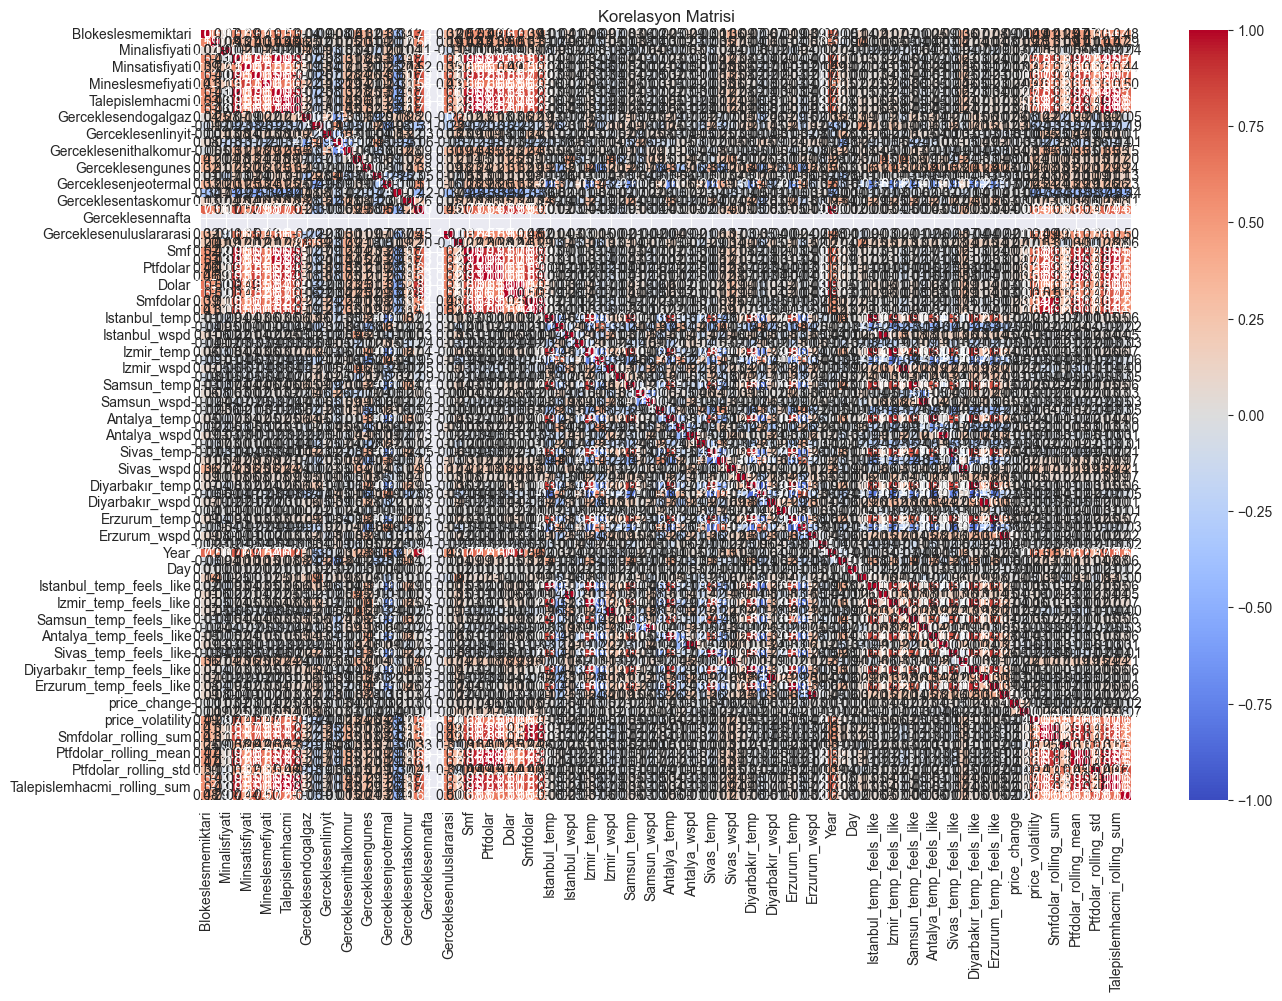


Hedef Değişken (Smf) ile Korelasyon:
Smf                             1.000000
Ptf                             0.971488
Maxeslesmefiyati                0.960590
Maxalisfiyati                   0.957829
Arzislemhacmi                   0.954832
Talepislemhacmi                 0.954282
Talepislemhacmi_rolling_mean    0.945106
Talepislemhacmi_rolling_sum     0.945106
Ptfeuro                         0.933422
Ptfdolar                        0.931536
Ptfdolar_rolling_sum            0.921725
Ptfdolar_rolling_mean           0.921725
Maxsatisfiyati                  0.905317
Smfeuro                         0.894428
Smfdolar                        0.863277
Name: Smf, dtype: float64


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleme
file_path = "processed_dataset_with_features.csv"
df = pd.read_csv(file_path)

# Sayısal sütunları seçme
numerical_columns = df.select_dtypes(include=['number']).columns

# Korelasyon matrisi hesaplama
correlation_matrix = df[numerical_columns].corr()

# 1. Korelasyon Matrisi Görselleştirme
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasyon Matrisi")
plt.show()

# 2. Hedef Değişkenle Korelasyon
target_column = "Smf"  # Hedef sütunu belirleyin
target_correlation = correlation_matrix[target_column].sort_values(ascending=False)

print("\nHedef Değişken (Smf) ile Korelasyon:")
print(target_correlation.head(15))



In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 1. Veri Setini Yükleme
file_path = "processed_dataset_with_features.csv"
df = pd.read_csv(file_path)

# 2. Hedef ve Bağımsız Değişkenlerin Ayrılması
target_column = "Smf"  # Tahmin edilecek hedef sütun
X = df.drop(columns=[target_column])  # Bağımsız değişkenler
y = df[target_column]  # Hedef değişken

# 3. Sadece Sayısal Değişkenleri Seçme
X = X.select_dtypes(include=['number'])

# 4. NaN, Sonsuzluk ve Çok Büyük Değerleri Detaylı Kontrol Etme
print("X içinde NaN değer var mı?:", np.isnan(X).any().any())
print("X içinde sonsuzluk (infinity) var mı?:", np.isinf(X).any().any())
print("X içinde çok büyük değerler var mı?:", (X.abs() > 1e10).any().any())

print("y içinde NaN değer var mı?:", np.isnan(y).any())
print("y içinde sonsuzluk (infinity) var mı?:", np.isinf(y).any())
print("y içinde çok büyük değerler var mı?:", (y.abs() > 1e10).any())

# 5. Sorunlu Değerleri Temizleme
X = X.replace([np.inf, -np.inf], np.nan)  # Sonsuz değerleri NaN ile değiştir
X = X.fillna(X.mean())  # NaN değerlerini sütun ortalamaları ile doldur
X = X.clip(lower=-1e10, upper=1e10)  # Çok büyük veya küçük değerleri sınırla

y = y.replace([np.inf, -np.inf], np.nan)  # Sonsuz değerleri NaN ile değiştir
y = y.fillna(y.mean())  # NaN değerlerini hedef değişkenin ortalamasıyla doldur
y = y.clip(lower=-1e10, upper=1e10)  # Çok büyük veya küçük değerleri sınırla

# Temizleme sonrası kontrol
print("Temizleme sonrası:")
print("X içinde NaN değer var mı?:", np.isnan(X).any().any())
print("X içinde sonsuzluk (infinity) var mı?:", np.isinf(X).any().any())
print("y içinde NaN değer var mı?:", np.isnan(y).any())
print("y içinde sonsuzluk (infinity) var mı?:", np.isinf(y).any())

X içinde NaN değer var mı?: False
X içinde sonsuzluk (infinity) var mı?: True
X içinde çok büyük değerler var mı?: True
y içinde NaN değer var mı?: False
y içinde sonsuzluk (infinity) var mı?: False
y içinde çok büyük değerler var mı?: False
Temizleme sonrası:
X içinde NaN değer var mı?: False
X içinde sonsuzluk (infinity) var mı?: False
y içinde NaN değer var mı?: False
y içinde sonsuzluk (infinity) var mı?: False


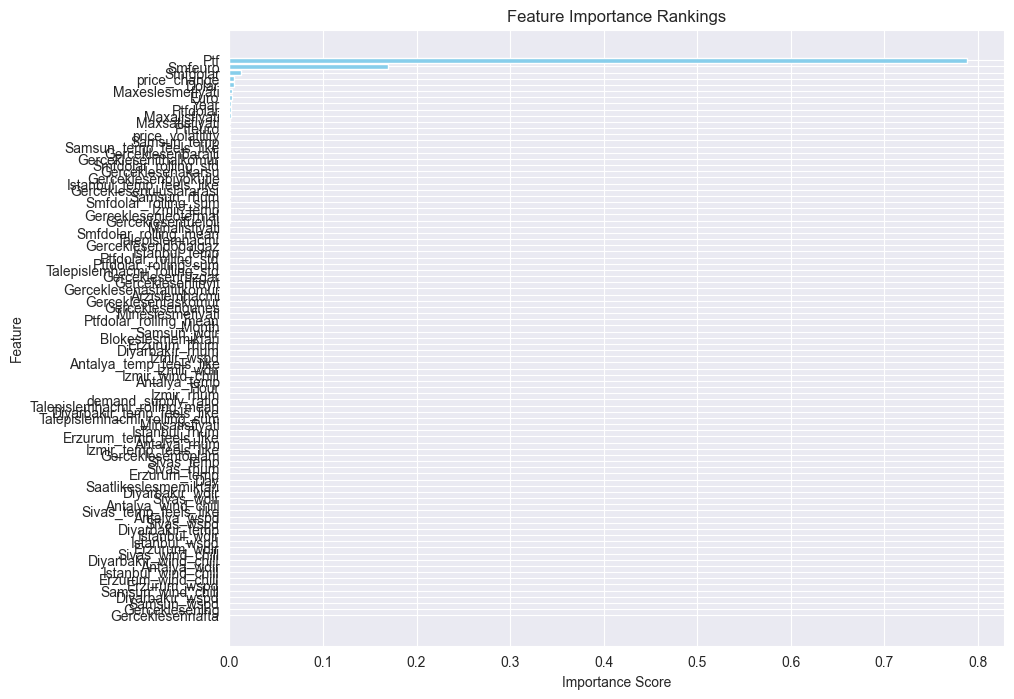


Özellik Önemi Sıralaması:
              Feature  Importance
26                Ptf    0.788811
32            Smfeuro    0.169583
31           Smfdolar    0.012466
79       price_change    0.004759
29              Dolar    0.004745
..                ...         ...
70  Samsun_wind_chill    0.000013
55    Diyarbakır_wspd    0.000011
43        Samsun_wspd    0.000010
23     Gerceklesenlng    0.000000
22   Gerceklesennafta    0.000000

[91 rows x 2 columns]


In [2]:
# 6. Model Eğitimi
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# 7. Özellik Önem Sıralaması
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 8. Özellik Önemini Görselleştirme
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Rankings')
plt.gca().invert_yaxis()
plt.show()

# 9. Özellik Sıralamasını Yazdırma
print("\nÖzellik Önemi Sıralaması:")
print(importance_df)


Gecikme Korelasyon Matrisi:
               Smf  Smf_lag1  Smf_lag2  Smf_lag3
Smf       1.000000  0.968289  0.940306  0.919650
Smf_lag1  0.968289  1.000000  0.968289  0.940307
Smf_lag2  0.940306  0.968289  1.000000  0.968289
Smf_lag3  0.919650  0.940307  0.968289  1.000000


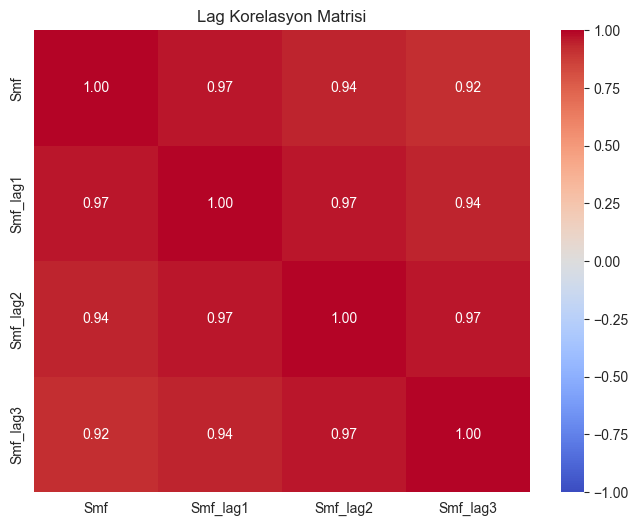

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri Setini Yükleme
file_path = "processed_dataset_with_features.csv"
df = pd.read_csv(file_path)

# 2. Hedef Değişken ve Zaman Sütunlarını Kontrol Etme
target_column = "Smf"  # Hedef değişken
time_column = "Tarih"  # Zaman sütunu

# Tarih sütununu datetime formatına dönüştürme
df[time_column] = pd.to_datetime(df[time_column])
df = df.sort_values(by=time_column)  # Zaman sütununa göre sıralama

# 3. Lag Features Eklemek
# Örnek olarak 1, 2 ve 3 dönem gecikme özellikleri ekleme
max_lag = 3  # Maksimum gecikme seviyesi
for lag in range(1, max_lag + 1):
    df[f'{target_column}_lag{lag}'] = df[target_column].shift(lag)

# 4. Gecikme Analizi
# Hedef değişken ve gecikme özellikleri arasındaki korelasyonu inceleme
lag_columns = [f'{target_column}_lag{i}' for i in range(1, max_lag + 1)]
correlation = df[[target_column] + lag_columns].corr()

print("\nGecikme Korelasyon Matrisi:")
print(correlation)

# Korelasyon Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Lag Korelasyon Matrisi")
plt.show()

# 5. Model İçin Kullanılabilir Gecikme Özelliklerini Belirleme
# İlk birkaç satır NaN olacağından, bu satırları kaldırıyoruz
df = df.dropna()

# Hedef ve bağımsız değişkenleri ayırma
X = df[lag_columns]  # Lag özelliklerini bağımsız değişken olarak kullan
y = df[target_column]  # Hedef değişken
